## effect sizes
- what is effect size
- p value vs effect size
- scipy

### P-value vs. Effect Size

Effect size measurement places its emphasis on the effect size only, unlike statistical significance which combines effect size and sample size, thus promoting a more scientific approach towards knowledge accumulation. Effect size is therefore routinely used towards **Meta-Analysis** i.e. for combining and comparing estimates from different studies conducted on different samples. 

By increasing sample size, you can show there is a statistically significant difference between two means. However, **statistically significant does not necessarily imply “significant."**.

>**P value** = probability sample means are the same.

>(1 – P) or **Confidence Level** = probability sample means are different.

>**Effect Size** = how different sample means are

In [18]:
from __future__ import print_function, division
import numpy as np

import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(10)

In [19]:
male_mean = 178
male_sd = 7.7

male_height = scipy.stats.norm(male_mean, male_sd)

In [20]:
male_height

In [21]:
female_mean = 163
female_sd = 7.3

female_height = scipy.stats.norm(female_mean, female_sd)

### Probability Density Function (PDF)
- continuous random variable, calculate PDF, P(a < X < b)
- discrete random variable, calculate Probability Mass Function, PMF

In [22]:
def cal_PDF(random_variable, x=4):
    ''' input: random variable and standard deviation
        output: x and y values for the normal distribution
    '''
    
    mean = random_variable.mean()
    std = random_variable.std()
    
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    ys = random_variable.pdf(xs)
    
    return xs, ys

[147.2        147.82222222 148.44444444 149.06666667 149.68888889
 150.31111111 150.93333333 151.55555556 152.17777778 152.8
 153.42222222 154.04444444 154.66666667 155.28888889 155.91111111
 156.53333333 157.15555556 157.77777778 158.4        159.02222222
 159.64444444 160.26666667 160.88888889 161.51111111 162.13333333
 162.75555556 163.37777778 164.         164.62222222 165.24444444
 165.86666667 166.48888889 167.11111111 167.73333333 168.35555556
 168.97777778 169.6        170.22222222 170.84444444 171.46666667
 172.08888889 172.71111111 173.33333333 173.95555556 174.57777778
 175.2        175.82222222 176.44444444 177.06666667 177.68888889
 178.31111111 178.93333333 179.55555556 180.17777778 180.8
 181.42222222 182.04444444 182.66666667 183.28888889 183.91111111
 184.53333333 185.15555556 185.77777778 186.4        187.02222222
 187.64444444 188.26666667 188.88888889 189.51111111 190.13333333
 190.75555556 191.37777778 192.         192.62222222 193.24444444
 193.86666667 194.488888

Text(0.5, 0, 'height (cm)')

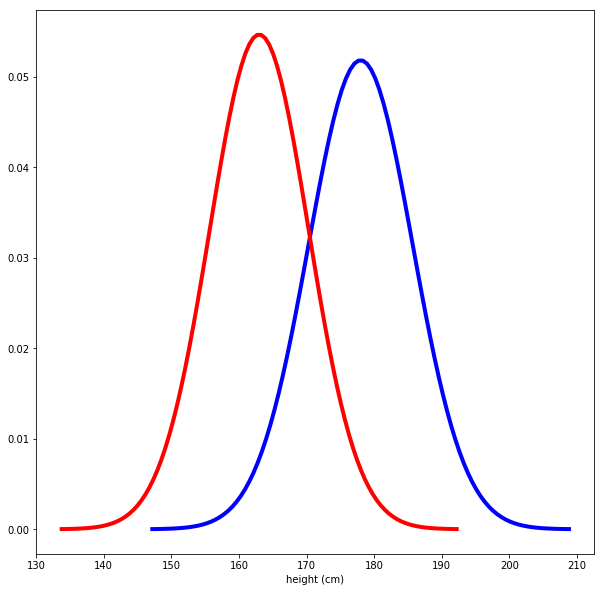

In [23]:
# male height
xs, ys = cal_PDF(male_height)
print(xs, ys)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xs, ys, label='male', linewidth=4, color='blue')

# female height
xs, ys = cal_PDF(female_height)
ax.plot(xs, ys, label='female', linewidth=4, color='red')

ax.set_xlabel('height (cm)')

### unstandardised or simple effect size calculation
- just mean difference between two samples

In [24]:
male_sample = male_height.rvs(1000)
print(male_sample.mean())
male_sample.std()

177.88791390576085


7.222274730410271

In [25]:
female_sample = female_height.rvs(1000)
print(female_sample.mean())
female_sample.std()

162.91903182040372


7.261850929417819

In [27]:
unstandardised_effect_size = female_sample.mean() - male_sample.mean()
unstandardised_effect_size

-14.968882085357137

In [ ]:
# problems: is 14 male higher than female a big difference? 
# the unit of measurements of both male and female could be different
# without knowing the standard deviation and spread of distribution, hard to know if 14 is large

#### difference as percentage

In [28]:
rel_diff = unstandardised_effect_size/female_sample.mean()
rel_diff * 100

-9.18792722869745

In [29]:
rel_diff = unstandardised_effect_size/male_sample.mean()
rel_diff * 100

-8.414783082614122

In [ ]:
# this leave us to choose which one to use - too much trouble

#### Overlap threshold

In [34]:
# mid between two means
mid_mean = (female_sample.mean() + male_sample.mean())/2
mid_mean

170.4034728630823

In [33]:
# auc
thresh = (female_sample.std() * female_sample.mean() + male_sample.std() * male_sample.mean()) /\
            (female_sample.std() + male_sample.std())
thresh

170.38302249313094

Text(0.5, 0, 'height (cm)')

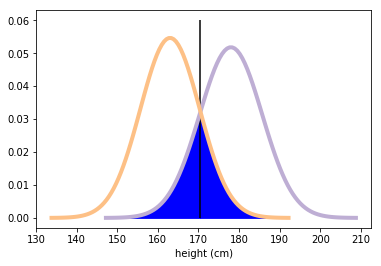

In [36]:
# Male height
m_xs, male_ys = cal_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = cal_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

In [39]:
# The "overlap" (shaded region above) is the total AUC (Area Under the Curves).
male_below_thresh = sum(male_sample < thresh)
male_below_thresh
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

155

In [40]:
# Calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap

0.308

In [41]:
# fraction of people who would be misclassfied if tried to use height to guess sex
misclassification_rate = overlap / 2
misclassification_rate

0.154

#### overlap superiority

In [42]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [43]:
overlap_superiority(male_height, female_height, n=1000)

170.5


(0.336, 0.94)

### Cohen's d
- using in terms of standardizer
- formula to calculate Cohen’s $d$ is:

> ** $d$ = effect size (difference of means) / pooled standard deviation **

In [44]:
def cal_cohen_d(group_one, group_two):
    
    ''' inputs: numpy array of two sample groups
        output: floating point number
    '''
    
    diff = group_one.mean() - group_two.mean()
    
    size_one, size_two = len(group_one), len(group_two)
    
    std_one, std_two = group_one.var(), group_two.var()
    
    pooled_std = (size_one * std_one + size_two * std_two) / (size_one + size_two)
    
    cohen_d = diff / np.sqrt(pooled_std)
    
    return cohen_d

In [45]:
cal_cohen_d(male_sample, female_sample)

2.0669285200851877

Cohen's $d$ has a few nice properties:

* Because mean and standard deviation have the same units, their ratio is dimensionless, so you can compare $d$ across different studies.

* In fields that commonly use $d$, people are calibrated to know what values should be considered big, surprising, or important.

* Given $d$ (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics

- general “rule of thumb” guidelines (which Cohen said should be used cautiously):

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

In [46]:
def plot_pdfs(cohen_d=2):
    
    group_one = scipy.stats.norm(0,1)
    group_two = scipy.stats.norm(cohen_d, 1)
    
    xs, ys = cal_PDF(group_one)
    plt.fill_between(xs, ys, label='group_one', color='b')
    
    xs, ys = cal_PDF(group_two)
    plt.fill_between(xs, ys, label='group_two', color='b')
    
    o, s = overlap_superiority(group_one, group_two)
    
    print('overlap', o)
    print('superiority', s)

    return 

1.0
overlap 1.69
superiority 0.076


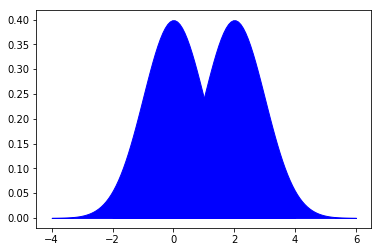

In [51]:
plot_pdfs(2)